<img src="Titulo.png" alt="Título" width="100%" height="auto">

# <span style="color:darkblue">Resumen</span>

En este proyecto se realiza el analisis datos correspondiente a las posiciones de partículas que pasan a través de un orificio obtenidos a través de análisis de imágenes, el experimento corresponde a una descarga de barras magnéticas a escala de laboratorio, mediante este análisis uno puede estudiar fenómenos que ocurren en sistemas de tráfico por ejemplo los atascamientos en carreteras, flujo vehicular, etc. 

# <span style="color:darkblue">Herramientas</span>

1. ImageJ (Seguimiento de partículas y obtención de datos)
2. Python (Preprocesamiento y análisis de datos)

# <span style="color:darkblue">Introducción</span>

El seguimiento de partículas mediante análisis de imágenes es una herramienta fundamental en distintas diciplinas de las ciencias exactas e ingenierías, en este proyecto se aborda un problema de obtener las posiciones de los centros de masa de un flujo de partículas magnéticas que pasan a traves de una apertura y utilizando analisis de datos determinar la velocidad promedio de las partículas cuando pasan por la salida, este problema puede servir para otro tipo de sistemas por ejemplo en el ambito de transporte es posible monitorear el flujo de vehículos en tiempo real a través de análisis de imágenes, identificando áreas de congestión y fluidez en las carreteras. Esto permite a las autoridades de tráfico tomar medidas rápidas para abordar problemas y mejorar la circulación. 

Problema real            |  Problema abordado
:-------------------------:|:-------------------------:
<img src="Trafico.gif" alt="Problema1" width="50%" height="auto">      |  <img src="Trafico2.gif" alt="Problema2" width="67%" height="auto">

# <span style="color:darkblue">Análisis de imágenes y seguimiento de partículas</span>

Para determinar las posiciones de los centros de masa de las partículas se utiliza el software [*ImageJ*](https://imagej.net/ij/), posteriormente realizamos los siguientes pasos:
* Importamos la secuencia de imágenes o video a procesar (debe ser formato avi), el vídeo analizado se observa en la figura anterior (Problema abordado).
* Se realiza un preprocesamiento de imágenes en ImageJ
    * Transformamos el video a formato 8-bit
    * Aplicamos un threshold (el video queda binarizado)
    * Las partículas quedan en color negro y el fondo en color blanco.
    * Se coloca la escala del sistema en el apartado Analyze > Set Scale (Se puede utilizar como referencia la longitud de la partícula por ejemplo)
* Se hace uso del plugin Multitracker el cual nos permite realizar un seguimiento de varios objetos a la vez
    * Plugins >> Analyze >> MTrack2  ([Descarga](https://imagej.net/plugins/mtrack2)) 
    * El plugin pedirá información sobre el tamaño aproximado de las partículas que se desean seguir así como el rango de velocidad en el que se encuentra el movimiento de los objetos.


Al realizar los pasos anteriores el programa nos arrojará una tabla de datos la cual guardaremos como <code>resultados.xlsx</code> este tendrá las posiciones $(x,y)$ de las partículas en los distintos frames del vídeo así como el número de partícula.

Esta es la tabla de datos sobre la cual vamos a trabajar.

En la siguiente imagen se muestran los parámetros del problema.

<img src="Esquema.jpg" alt="Esquema" width="35%" height="auto">

# <span style="color:darkblue">Preprocesamiento de datos </span>

Realizamos la importación de librerías necesarias

In [1]:
import pandas as pd    #Para importar pandas 
import numpy as np     #Para importar numpy 
import plotnine as p9  
from plotnine import * # Para importar plotnine

Definimos los siguientes parámetros importantes:

In [2]:
#Definimos los siguientes parámetros
k = 46.6741  # Conversión pixeles a cm (pix/cm) (escala del video)
a = 135      # Distancia a la orilla de la apertura en pixeles
i_p = 176    # Posición vertical inicial de la salida en pixeles
f_p = 434    # Posición vertical final de la salida en pixeles
n = 500      # Número de frames por segundo (fps) al que fue grabado el video
N = 3857     # Número de frames que dura el video
j = 75       # Número de partículas a analizar
g = 7.5      # Tamaño de la apertura en cm

Convertimos el archivo de datos <code>resultados.xlsx</code> obtenido del seguimiento de particulas a tipo csv y realizamos la lectura

In [3]:
# Leemos el archivo de datos
#data = pd.read_csv("C:\\Users\\Martin\\OneDrive\\Documentos\\Python Scripts\\resultados.csv")
data = pd.read_csv("resultados.csv")
data

,Frame,X1,Y1,Flag1,X2,Y2,Flag2,X3,Y3,Flag3,...,Flag72,X73,Y73,Flag73,X74,Y74,Flag74,X75,Y75,Flag75
0,Tracks 1 to 75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,266.76358,12.938859,,369.64676,32.615303,,444.5257,7.2965736,,...,,,,,,,,,,
2,2,268.58115,14.165419,,369.80222,34.992004,,444.69907,9.089342,,...,,,,,,,,,,
3,3,270.3088,15.256662,,369.62802,38.057564,,445.9818,11.021957,,...,,,,,,,,,,
4,4,271.9978,16.36463,,369.1634,41.475105,,447.52377,13.094595,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3853,3853,,,,,,,,,,...,,,,,,,,,,
3854,3854,,,,,,,,,,...,,,,,,,,,,
3855,3855,,,,,,,,,,...,,,,,,,,,,
3856,3856,,,,,,,,,,...,,,,,,,,,,


El archivo contiene las posiciones de las partículas en el video, el origen del sistema de coordenadas se encuentra en la esquina superior izquierda del video, la información de cada partícula está separada por una columna llamada <code>Flag</code> y los valores númericos se encuentran en pixeles, este archivo contiene la información de 75 partículas que atravesaron la salida, vamos a calcular ahora su perfil de velocidad promediado en el tiempo.

Realizamos un preprocesamiento de datos para acomodar la información.

In [4]:
#Eliminado de Filas innecesarias  
data.drop([0],axis=0, inplace = True) 
data.drop(data.index[N+1:], inplace=True) 
data

,Frame,X1,Y1,Flag1,X2,Y2,Flag2,X3,Y3,Flag3,...,Flag72,X73,Y73,Flag73,X74,Y74,Flag74,X75,Y75,Flag75
1,1,266.76358,12.938859,,369.64676,32.615303,,444.5257,7.2965736,,...,,,,,,,,,,
2,2,268.58115,14.165419,,369.80222,34.992004,,444.69907,9.089342,,...,,,,,,,,,,
3,3,270.3088,15.256662,,369.62802,38.057564,,445.9818,11.021957,,...,,,,,,,,,,
4,4,271.9978,16.36463,,369.1634,41.475105,,447.52377,13.094595,,...,,,,,,,,,,
5,5,273.2018,17.476673,,368.4735,45.014538,,449.56653,15.096914,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3853,3853,,,,,,,,,,...,,,,,,,,,,
3854,3854,,,,,,,,,,...,,,,,,,,,,
3855,3855,,,,,,,,,,...,,,,,,,,,,
3856,3856,,,,,,,,,,...,,,,,,,,,,


In [5]:
# Convertimos el dataframe a tipo númerico
data.replace(to_replace=" ", value=None, inplace=True)
data.replace(to_replace="*", value=None, inplace=True)
data = data.apply(pd.to_numeric) #Aplica la función to_numeric a todas las columnas del dataframe
data

,Frame,X1,Y1,Flag1,X2,Y2,Flag2,X3,Y3,Flag3,...,Flag72,X73,Y73,Flag73,X74,Y74,Flag74,X75,Y75,Flag75
1,1,266.76358,12.938859,NaN,369.64676,32.615303,NaN,444.52570,7.296574,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,268.58115,14.165419,NaN,369.80222,34.992004,NaN,444.69907,9.089342,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,270.30880,15.256662,NaN,369.62802,38.057564,NaN,445.98180,11.021957,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,271.99780,16.364630,NaN,369.16340,41.475105,NaN,447.52377,13.094595,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,273.20180,17.476673,NaN,368.47350,45.014538,NaN,449.56653,15.096914,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3853,3853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3854,3854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3855,3855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3856,3856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Definimos algunas funciones útiles

In [6]:
# Función para cambiar las dimensiones de pixeles a cm 
# k es la conversion de pixeles a cm
def convertion(x):
    return x/k
# Función para trasladar el eje de coordenadas en x 
def translation(x):
    return x-a-g*k/2

# <span style="color:darkblue">Análisis de datos </span>

Calculamos la velocidad de las partículas al pasar por el orificio de salida

In [7]:
#Filtrado de filas con posición vertical "Y" entre los valores i_p y f_p Para la partícula 1 
filtered_df = data[ (data["Y1"] > i_p) & (data["Y1"] < f_p)][["X1","Y1"]]
# Calculo de la velocidad dentro del cuadro de interés Para la partícula 1
ser1 = pd.Series(filtered_df["X1"]) #Extraemos la columna "X"
ser2 = pd.Series(filtered_df["Y1"]) #Extraemos la columna "Y"
#Ajustamos indices
ser1 = ser1.reset_index(drop=True)
ser2 = ser2.reset_index(drop=True)
#La velocidad para esta partícula es 
len = ser1.size #Longitud de la serie ser1
vel = n*(ser2[len-1] - ser2[0])/(len) #velocidad
ser3 = pd.Series(vel) #añadimos el resultado a una nueva serie 
#la posición X de la partícula es
ser4 = pd.Series(ser1[0:].mean()) #calcula el promedio de las posiciones X de la partícula

In [8]:
#%% Calculo de la velocidad para las demás partículas
i = 1
while i < j:
  filtered_df = data[ (data["Y" + str(i+1)] > i_p) & (data["Y" + str(i+1)] < f_p)][["X" + str(i+1),"Y" + str(i+1)]]
  # Calculo de la velocidad dentro del cuadro de interés Para la partícula i
  ser1 = pd.Series(filtered_df["X" + str(i+1)]) #Extraemos la columna "X"
  ser2 = pd.Series(filtered_df["Y" + str(i+1)]) #Extraemos la columna "Y"
  #Ajustamos indices
  ser1 = ser1.reset_index(drop=True)
  ser2 = ser2.reset_index(drop=True)
  len = ser1.size #Longitud de la serie ser1
  if len != 0:
      vel = n*(ser2[len-1] - ser2[0])/(len) #velocidad  
      ser3 = pd.concat([ser3, pd.Series(vel)]) #añadimos el resultado a una nueva serie 
      #la posición X de la partícula es
      ser4 = pd.concat([ser4, pd.Series(ser1[0:].mean())])#calcula el promedio de las posiciones X de la partícula
  else:
      b=1;
  i += 1

In [9]:
#%% Ajustamos índices
ser3 = ser3.reset_index(drop=True)
ser4 = ser4.reset_index(drop=True)

In [11]:
#Trasladamos el eje x
ser4 = ser4.apply(translation)
#Guardamos los Resultados en un nuevo DataFrame
Results1 = pd.concat([ser4, ser3], axis=1)
Results1 = Results1.apply(convertion)
Results1 = Results1.rename(columns={0: 'x', 1: 'v' })
Results1

,x,v
0,-0.473874,115.942437
1,1.759235,109.260141
2,0.456132,90.282709
3,3.611733,38.407362
4,-2.937988,106.915308
...,...,...
66,0.435380,126.855294
67,-0.382588,133.419386
68,-1.014263,123.726256
69,3.321637,76.625103


El resultado anterior nos arroja una nueva tabla de datos con las posiciones $x$ por donde pasan las partículas al cruzar el orificio y la velocidad con la que salen transformado ya en unidades de $cm$ y segundos, la posición $x=0$ corresponde al centro de la abertura de salida y en este caso mide $7.5 cm$.

# <span style="color:darkblue">Resultados</span>

Gráficamos los resultados para obtener la distribución de velocidades

C:\Users\marti\AppData\Roaming\Python\Python39\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 9 rows containing missing values.


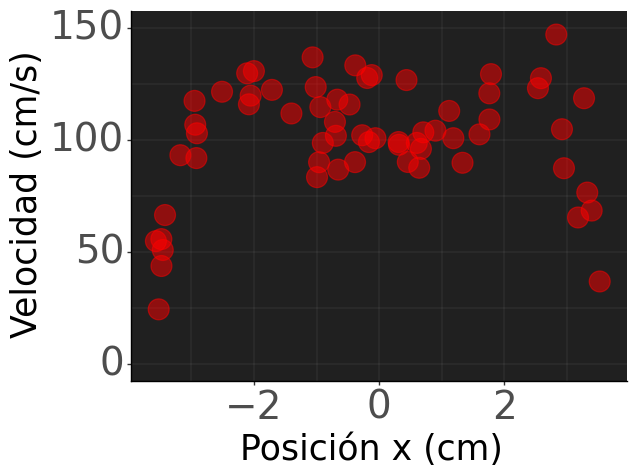

<ggplot: (125226318294)>

In [12]:
FIGURA = (ggplot() +    
               geom_point(data = Results1, 
                        mapping = aes(x="x", y="v"),
                        color = "red",
                        alpha = 0.5,
                        size = 8 , shape = "o")
                        + p9.labels.xlab('Posición x (cm)')
                        + p9.labels.ylab('Velocidad (cm/s)')
                        + scale_x_continuous(limits=(-3.6, 3.6))
                        + scale_y_continuous(limits=(0, 150))
                        + theme(
                            panel_background = element_rect("#202020"),
                            panel_grid = element_line(color = "darkgrey", size = 0.1),
                            axis_line=element_line(size=1),
                            axis_text=element_text(size=28),
                            axis_title_y=element_text(size=25),
                            axis_title_x=element_text(size=25)))
FIGURA

La gráfica anterior nos muestra el perfil de velocidades de las partículas al atravesar el orificio de salida, cada uno de los puntos indican una partícula, el eje horizontal muestra la posición $x$ por la cual salió, y eje vertical muestra su velocidad promedio al salir, se puede observar que la velocidad de salida disminuye considerablemente en los extremos del orificio de salida, en donde pueden suceder atascamientos, mientras que las partículas que pasan por el centro poseen una mayor velocidad y se observa que la mayoría de partículas pasan por el centro (varios puntos superpuestos).

El análisis de los perfiles de velocidad en un sistema de tráfico es crucial para optimizar el diseño de vialidades y carreteras, y así asegurar la eficiencia del proceso de tránsito, evitar problemas como la segregación y el bloqueo. Entender y controlar estos perfiles permite un manejo más efectivo y seguro de los flujos de automoviles o peatones en las calles.
En este pequeño ejemplo práctico realizamos una sencilla estimación y análisis de como obtener un perfil de velocidad para un sistema a escala de laboratorio.